In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.interpolate import griddata
import numpy as np

In [53]:
grape_vf = pd.read_csv("data/GRAPE_VF.csv")
grape_vf

,Subject Number,Laterality,Age,Gender,IOP,CCT,Total Visits,PLR2,PLR3,MD,...,50,51,52,53,54,55,56,57,58,59
0,1,OD,46,F,14.7,535,3,0,0,0,...,20,22,21,23,26,14,13,19,20,21
1,1,OS,46,F,15.3,525,4,0,0,0,...,21,22,21,21,21,23,25,22,25,22
2,2,OS,57,M,15.5,545,3,0,0,0,...,17,20,24,13,-1,-1,-1,-1,-1,23
3,3,OD,41,M,17.0,557,7,1,0,1,...,27,25,16,21,22,23,23,22,26,30
4,4,OS,58,M,14.7,487,4,0,0,0,...,21,22,22,16,24,23,22,12,14,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,142,OS,34,F,20.7,516,6,0,0,0,...,27,24,23,3,3,-1,14,28,27,25
259,143,OD,51,F,9.0,479,4,0,0,0,...,27,27,27,28,27,28,27,26,26,26
260,143,OS,51,F,8.0,477,4,1,0,0,...,21,24,28,28,27,26,24,25,25,22
261,144,OD,21,M,20.0,556,3,0,0,0,...,29,26,24,24,27,26,24,16,23,27


In [54]:
grape_fu = pd.read_csv("data/GRAPE_FollowUps.csv")
grape_fu

,Subject Number,Laterality,Visit Number,Interval Years,IOP,Corresponding CFP,0,1,2,3,...,50,51,52,53,54,55,56,57,58,59
0,1,OD,1,0.000000,14.7,1_OD_1.jpg,21,22,20,23,...,20,22,21,23,26,14,13,19,20,21
1,1,OD,2,0.838356,17.0,1_OD_2.jpg,31,28,28,29,...,20,22,17,22,16,12,14,21,21,18
2,1,OD,3,2.134247,16.5,1_OD_3.jpg,26,25,26,27,...,20,19,12,20,12,5,20,22,25,22
3,1,OS,1,0.000000,15.3,1_OS_1.jpg,24,26,23,26,...,21,22,21,21,21,23,25,22,25,22
4,1,OS,2,0.756164,16.5,1_OS_2.jpg,30,27,27,27,...,27,23,20,22,22,21,20,21,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,144,OD,2,0.991781,14.5,144_OD_2.jpg,32,31,30,32,...,27,26,23,24,28,28,28,26,22,26
1111,144,OD,3,1.568431,18.2,/,27,27,28,28,...,29,26,24,24,27,28,30,23,26,28
1112,144,OS,1,0.000000,18.0,144_OS_1.jpg,32,32,29,30,...,22,24,23,23,26,27,26,23,24,23
1113,144,OS,2,0.991781,11.5,144_OS_2.jpg,32,29,30,29,...,22,23,24,24,25,28,25,22,22,22


In [78]:
x = np.array(grape_vf.iloc[0][17:]).astype(int)

cropped = grape_fu.drop(columns = ['Interval Years', 'IOP', 'Corresponding CFP'])
#cropped = grape_vf.drop(columns = ['Age', 'Gender', 'IOP', 'CCT', 'Total Visits', 'PLR2', 'PLR3', 'MD', 'Mean', 'S', 'N','I', 'T', 'Corresponding CFP', 'Category of Glaucoma'])
cropped

,Subject Number,Laterality,Visit Number,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,1,OD,1,21,22,20,23,24,25,14,...,20,22,21,23,26,14,13,19,20,21
1,1,OD,2,31,28,28,29,28,27,28,...,20,22,17,22,16,12,14,21,21,18
2,1,OD,3,26,25,26,27,26,25,22,...,20,19,12,20,12,5,20,22,25,22
3,1,OS,1,24,26,23,26,26,27,23,...,21,22,21,21,21,23,25,22,25,22
4,1,OS,2,30,27,27,27,27,26,27,...,27,23,20,22,22,21,20,21,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,144,OD,2,32,31,30,32,31,29,31,...,27,26,23,24,28,28,28,26,22,26
1111,144,OD,3,27,27,28,28,27,27,29,...,29,26,24,24,27,28,30,23,26,28
1112,144,OS,1,32,32,29,30,31,29,28,...,22,24,23,23,26,27,26,23,24,23
1113,144,OS,2,32,29,30,29,29,27,31,...,22,23,24,24,25,28,25,22,22,22


In [37]:

# #right eye coordinates with 2 point optic nerve (61)
# octopus61_coords = np.array([
#     (0,0), (1,-1), (-1,-1), (-1,1), (1,1), (2,-2), (-2,-2), (-2,2),
#     (2,2), (4,-1), (4,-4), (1,-4), (-1,-4), (-4,-4), (-4,-1), (-4,1), (-4,4),
#     (-1,4), (1,4), (4,4), (4,1), (6,-1), (6,-6), (2,-6), (-2,-6), (-6,-6),
#     (-6,-1), (-6,1), (-6,6), (-2,6), (2,6), (6,6), (6,1), (8,-1), (8,-6), (8,-8), (6,-8), (2,-8), 
#     (-2,-8), (-6,-8), (-8,-8), (-8,-6), (-8,-1), (-8,1), (-8,6), (-8,8), (-6,8), (-2,8), (2,8), (6,8),
#     (8,8), (8,6), (8,1), (10,-3), (3,-10), (-3,-10), (-10, -2), (-10,2), (-3,10), (3,10), (10,3)
# ])

#array for smaller optic nerve spot (60)
octopus61_coords = np.array([
    (0,0), (1,-1), (-1,-1), (-1,1), (1,1), (2,-2), (-2,-2), (-2,2),
    (2,2), (4,-1), (4,-4), (1,-4), (-1,-4), (-4,-4), (-4,-1), (-4,1), (-4,4),
    (-1,4), (1,4), (4,4), (4,1), (6,0), (6,-6), (2,-6), (-2,-6), (-6,-6),
    (-6,-1), (-6,1), (-6,6), (-2,6), (2,6), (6,6), (8,-1), (8,-6), (8,-8), (6,-8), (2,-8), 
    (-2,-8), (-6,-8), (-8,-8), (-8,-6), (-8,-1), (-8,1), (-8,6), (-8,8), (-6,8), (-2,8), (2,8), (6,8),
    (8,8), (8,6), (8,1), (10,-3), (3,-10), (-3,-10), (-10, -2), (-10,2), (-3,10), (3,10), (10,3)
])

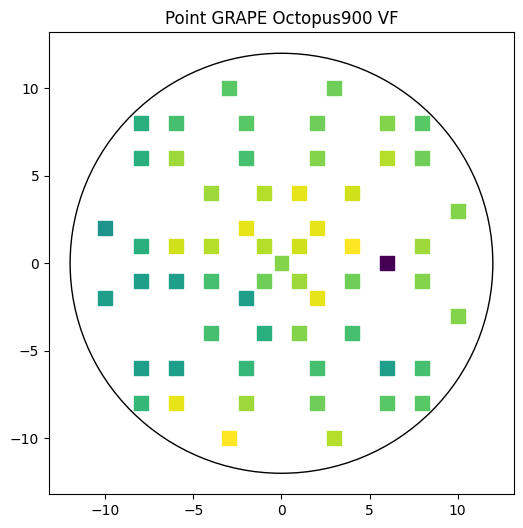

In [38]:
id_1 = np.array(grape_vf.iloc[0][17:]).astype(int)

fig, ax = plt.subplots(figsize = (6,6))

ax.scatter(octopus61_coords[:,0], octopus61_coords[:,1], c= id_1, s=100, marker='s')
circle = mpatches.Circle((0,0), 12, fill = False)
ax.add_patch(circle)
#plt.axis('off')
plt.title('Point GRAPE Octopus900 VF')
plt.show()

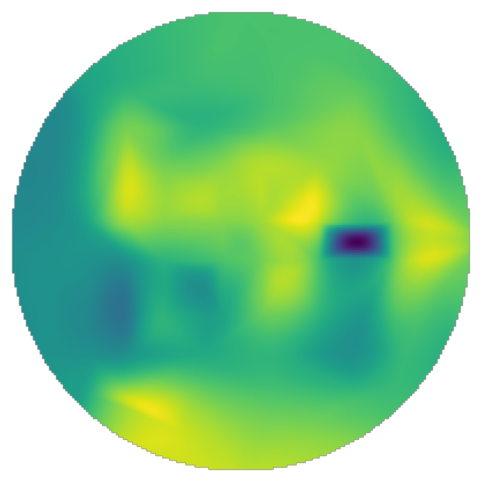

In [39]:
id_1 = np.array(grape_vf.iloc[0][17:]).astype(int)

outer_coords = np.array([
    (13, 0), (13, -13), (0, -13),(-13, -13), 
    (-13, 0),(-13, 13), (0, 13),(13, 13)
])
outer_values = np.array(id_1[-8:])


all_coords = np.vstack([octopus61_coords, outer_coords])
all_values = np.concatenate([id_1, outer_values])

grid_x, grid_y = np.mgrid[-12:12:200j, -12:12:200j]
grid_z = griddata(all_coords, all_values, (grid_x, grid_y), method='cubic')

radius = 12
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

fig, ax = plt.subplots(figsize = (6,6))
ax.imshow(masked_grid.T, extent = (-12,12,-12,12), origin ='lower', cmap ='viridis')
#ax.scatter(octopus61_coords[:,0], octopus61_coords[:,1], c= id_1, s=100, marker='s')
plt.axis('off')
plt.show()

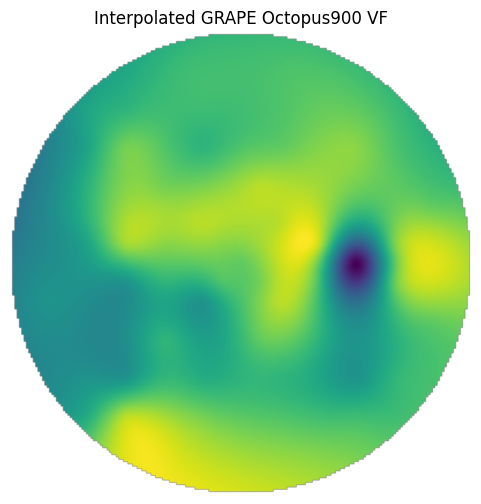

In [41]:
from scipy.interpolate import Rbf

id_1 = np.array(grape_vf.iloc[0][17:]).astype(int)

all_coords = np.vstack([octopus61_coords])


grid_x, grid_y = np.mgrid[-12:12:200j, -12:12:200j]

rbf = Rbf(all_coords[:,0], all_coords[:,1], id_1, function='thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 12
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)


fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(masked_grid.T, extent=(-12,12,-12,12), origin='lower', cmap='viridis')
plt.axis('off')
plt.title("Interpolated GRAPE Octopus900 VF")
plt.show()

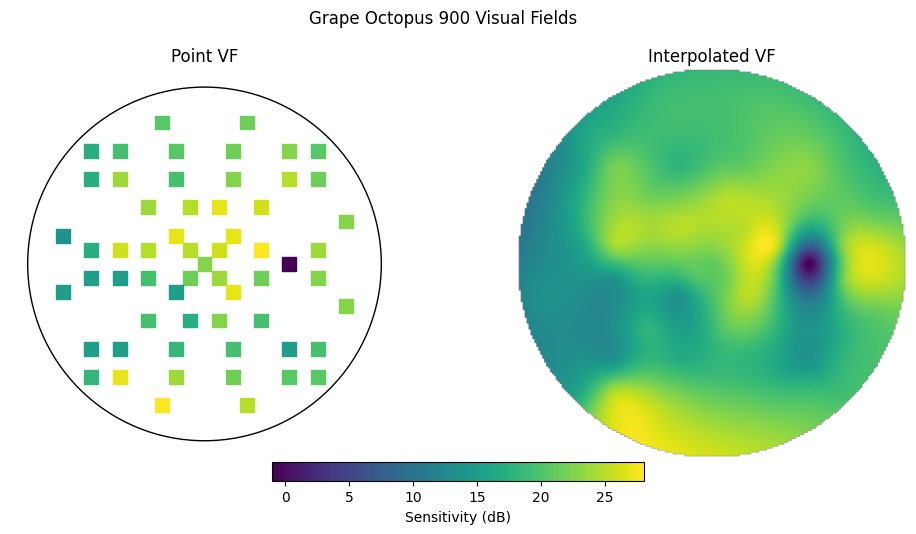

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))

ax[0].scatter(octopus61_coords[:,0], octopus61_coords[:,1], c= id_1, s=100, marker='s')
circle = mpatches.Circle((0,0), 12.5, fill = False)
ax[0].add_patch(circle)
ax[0].set_title("Point VF")
ax[0].axis('off')

#--------------------------------

all_coords = np.vstack([octopus61_coords])


grid_x, grid_y = np.mgrid[-12:12:200j, -12:12:200j]

rbf = Rbf(all_coords[:,0], all_coords[:,1], id_1, function='thin_plate')
grid_z = rbf(grid_x, grid_y)

radius = 12
mask = np.sqrt(grid_x**2 + grid_y**2) <= radius
masked_grid = np.where(mask, grid_z, np.nan)

im = ax[1].imshow(masked_grid.T, extent=(-12,12,-12,12), origin='lower', cmap='viridis')
ax[1].set_title("Interpolated VF")
ax[1].axis('off')
fig.suptitle("Grape Octopus 900 Visual Fields")


ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
bar = fig.colorbar(im, orientation = 'horizontal', ax = ax, shrink = 0.4, pad = 0.008)
bar.set_label('Sensitivity (dB)')
plt.savefig('images/example_grape_visual_fields.png', bbox_inches = 'tight')

# NPY Visual

Each pt in the GRAPE dataset is saved in an npy file as `PT#_EYE.npy` and `PT#_EYE_FU#.npy`

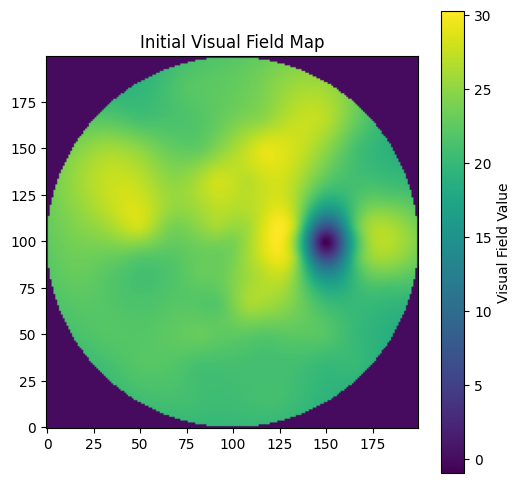

In [9]:
x = np.load("images/GRAPE/Initial/1_OS.npy")

values = x[:, :, 0]

plt.figure(figsize=(6,6))
plt.imshow(values, cmap='viridis', origin='lower')
plt.colorbar(label='Visual Field Value')
plt.title('Initial Visual Field Map')
plt.show()

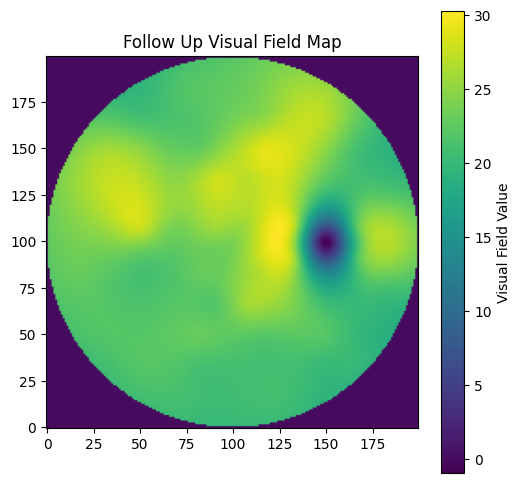

In [11]:
x = np.load("images/GRAPE/FollowUp/1_OS_1.npy")

values = x[:, :, 0]

plt.figure(figsize=(6,6))
plt.imshow(values, cmap='viridis', origin='lower')
plt.colorbar(label='Visual Field Value')
plt.title('Follow Up Visual Field Map')
plt.show()

In [88]:
df = pd.read_pickle('GRAPE.pkl')
df

Visit Number,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
1-OD,"[21, 22, 20, 23, 24, 25, 14, 25, 25, 20, 18, 2...","[31, 28, 28, 29, 28, 27, 28, 30, 28, 24, 23, 2...","[26, 25, 26, 27, 26, 25, 22, 28, 25, 26, 23, 2...",NaN,NaN,NaN,NaN,NaN,NaN
1-OS,"[24, 26, 23, 26, 26, 27, 23, 26, 28, 26, 24, 2...","[30, 27, 27, 27, 27, 26, 27, 27, 27, 24, 23, 2...","[31, 29, 27, 28, 28, 28, 27, 28, 27, 28, 25, 2...","[29, 32, 24, 26, 29, 30, 27, 20, 31, 31, 24, 2...",NaN,NaN,NaN,NaN,NaN
10-OD,"[31, 30, 29, 29, 29, 30, 28, 30, 29, 29, 29, 2...","[26, 28, 28, 27, 28, 29, 26, 26, 29, 31, 27, 2...","[30, 29, 28, 26, 27, 31, 27, 28, 21, 31, 25, 2...","[28, 27, 22, 24, 27, 29, 19, 22, 28, 27, 24, 2...",NaN,NaN,NaN,NaN,NaN
10-OS,"[32, 31, 29, 30, 30, 29, 30, 31, 29, 28, 25, 2...","[30, 30, 29, 28, 30, 30, 28, 27, 29, 29, 28, 2...","[20, 21, 21, 25, 21, 16, 28, 19, 28, 20, 22, 2...","[29, 30, 23, 25, 27, 28, 27, 18, 29, 25, 24, 2...",NaN,NaN,NaN,NaN,NaN
100-OD,"[29, 32, 29, 30, 16, 26, 26, 25, 24, 27, 25, 2...","[31, 29, 27, 25, 27, 28, 31, 19, 28, 28, 27, 2...","[25, 28, 29, 23, 26, 26, 25, 23, 25, 23, 15, 2...","[23, 26, 24, 21, 24, 27, 28, 13, 27, 27, 26, 2...","[31, 28, 30, 27, 27, 26, 31, 26, 24, 24, 24, 2...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
97-OS,"[32, 30, 29, 30, 29, 28, 30, 31, 28, 28, 25, 2...","[32, 30, 29, 28, 28, 28, 30, 28, 27, 28, 25, 2...","[32, 29, 29, 28, 28, 28, 30, 28, 27, 28, 26, 2...","[25, 24, 25, 24, 23, 24, 25, 25, 25, 26, 23, 2...",NaN,NaN,NaN,NaN,NaN
98-OD,"[20, 21, 16, 18, 19, 20, 15, 16, 13, 20, 18, 1...","[19, 25, 22, 16, 20, 25, 20, 7, 13, 20, 7, 8, ...","[14, 9, 11, 24, 24, 20, 14, 19, 11, 19, 21, 17...","[30, 33, 26, 23, 28, 27, 28, 16, 25, 26, 15, 1...",NaN,NaN,NaN,NaN,NaN
98-OS,"[32, 31, 32, 29, 31, 31, 32, 28, 31, 29, 29, 2...","[28, 30, 33, 15, 31, 29, 28, 25, 27, 28, 26, 2...","[22, 26, 23, 20, 24, 27, 23, 12, 28, 27, 23, 2...",NaN,NaN,NaN,NaN,NaN,NaN
